#Uvod u znanost o podacima (UZOP) - Projekt - Prvi dio

Ovaj dio projekta rješavate uz skup podataka kojeg će vam poslati asistent kod kojeg ste se prijavili. Ova vježba nosi ukupno 10 bodova. U slučaju bilo kakvih pitanja ili nejasnoća javite se nadležnom asistentu.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Učitajte danu CSV datoteku i prikažite prvih 8 redaka iz skupa podataka. (0,5 boda)




In [27]:
data = pd.read_csv("Life_Expectancy_Data_fixed.csv")
data.head(8)

,Entry number,Source,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Income composition of resources,Schooling,Life expectancy,Measles,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,thinness 10-19 years
0,0,WHO,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,...,0.479,10.1,1.0,1154,19.1,83,65.0,0.1,17.3,17.2
1,1,WHO,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,...,0.476,10.0,0.0,492,18.6,86,62.0,0.1,17.5,17.5
2,2,WHO,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,...,0.470,9.9,0.0,430,18.1,89,64.0,0.1,17.7,17.7
3,3,WHO,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,...,0.463,9.8,0.0,2787,17.6,93,67.0,0.1,18.0,17.9
4,4,WHO,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,...,0.454,9.5,0.0,3013,17.2,97,68.0,0.1,18.2,18.2
5,5,WHO,Afghanistan,2010,Developing,279.0,74,0.01,79.679367,66.0,...,0.448,9.2,0.0,1989,16.7,102,66.0,0.1,18.4,18.4
6,6,WHO,Afghanistan,2009,Developing,281.0,77,0.01,56.762217,63.0,...,0.434,8.9,0.0,2861,16.2,106,63.0,0.1,18.7,18.6
7,7,WHO,Afghanistan,2008,Developing,287.0,80,0.03,25.873925,64.0,...,0.433,8.7,0.0,1599,15.7,110,64.0,0.1,18.9,18.8


2. Pronađite monotone i konstantne vrijednosti i uklonite ih. (1 bod)




In [28]:
const = []
mono = []
for col in data.columns:
  if data[col].nunique() == 1:
    const.append(col)
  if data[col].is_monotonic_increasing or data[col].is_monotonic_decreasing:
    mono.append(col)
deletecolums = const + mono
deletecolums = set(deletecolums)
data2 = data.drop(deletecolums, axis=1)
data2.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Polio,Total expenditure,...,Income composition of resources,Schooling,Life expectancy,Measles,BMI,under-five deaths,Diphtheria,HIV/AIDS,thinness 5-9 years,thinness 10-19 years
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,6.0,8.16,...,0.479,10.1,1.0,1154,19.1,83,65.0,0.1,17.3,17.2
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,58.0,8.18,...,0.476,10.0,0.0,492,18.6,86,62.0,0.1,17.5,17.5
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,62.0,8.13,...,0.470,9.9,0.0,430,18.1,89,64.0,0.1,17.7,17.7
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,67.0,8.52,...,0.463,9.8,0.0,2787,17.6,93,67.0,0.1,18.0,17.9
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,68.0,7.87,...,0.454,9.5,0.0,3013,17.2,97,68.0,0.1,18.2,18.2


3. Pronađite nedostajuće vrijednosti. Provedite zamjenu/uklanjanje nedostajućih vrijednosti odgovarajućim postupkom. Objasnite zašto ste primjenili odabrane postupke. (2 boda)

In [29]:
missing = data2.isnull().sum()
print(missing[missing > 0])
#način zamjene nedostajućih vrijednosti odabrala sam kako bi podatci bili u ravnoteži,
#odnosno da ne izgubimo doprinos svakog pojedinog stupca u daljnoj analizi
for col in missing.index:
    if pd.api.types.is_numeric_dtype(data2[col]): #ako je stupac numerički, zamjena nedostajućih vrijednosti s prosječnom vrijednošću stupca
        data2[col] = data2[col].fillna(data2[col].mean())
    else:
        data2[col] = data2[col].fillna(data2[col].mode()[0]) #ako je stupac kategorički, zamjena nedostajućih vrijednosti s najčešćom vrijednošću


Alcohol        194
Hepatitis B    553
dtype: int64


*4*. Transformirajte kategoričke značajke u numeričke. (1 bod)

In [30]:
data3 = pd.get_dummies(data2, drop_first=True)
print(data3.head())

   Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   

   Hepatitis B  Polio  Total expenditure         GDP  Population  ...  \
0         65.0    6.0               8.16  584.259210  33736494.0  ...   
1         62.0   58.0               8.18  612.696514    327582.0  ...   
2         64.0   62.0               8.13  631.744976  31731688.0  ...   
3         67.0   67.0               8.52  669.959000   3696958.0  ...   
4         68.0   68.0               7.87   63.537231   2978599.0  ...   

   Country_United States of America  Country_Uruguay  Country_Uzbekistan  \
0                           

5. Za numeričke značajke prikažite srednju (mean), centralnu (median), minimalnu i maksimalnu vrijednost. Za kategoričke značajke ispišite učestalost pojavljivanja svake vrijednosti. (1,5 boda)

In [31]:
num = data2.select_dtypes(include=['number'])

for col in num.columns:
    print(f"\n'{col}':")
    print(f"mean: {num[col].mean()}")
    print(f"median: {num[col].median()}")
    print(f"min: {num[col].min()}")
    print(f"max: {num[col].max()}")



'Year':
mean: 2007.5187202178352
median: 2008.0
min: 2000
max: 2015

'Adult Mortality':
mean: 164.72566371681415
median: 144.0
min: 1.0
max: 723.0

'infant deaths':
mean: 30.303948264125257
median: 3.0
min: 0
max: 1800

'Alcohol':
mean: 4.602860787172012
median: 4.16
min: 0.01
max: 17.87

'percentage expenditure':
mean: 738.2512954533831
median: 64.912906045
min: 0.0
max: 19479.91161

'Hepatitis B':
mean: 80.94046121593291
median: 87.0
min: 1.0
max: 99.0

'Polio':
mean: 82.61776718856365
median: 93.0
min: 3.0
max: 99.0

'Total expenditure':
mean: 5.924098025867937
median: 5.755
min: 0.37
max: 17.6

'GDP':
mean: 6611.523863415521
median: 1766.947595
min: 1.68135
max: 119172.7418

'Population':
mean: 10230851.228196053
median: 1386542.0
min: 34.0
max: 1293859294.0

'Income composition of resources':
mean: 0.630361810755616
median: 0.677
min: 0.0
max: 0.948

'Schooling':
mean: 12.009836623553436
median: 12.3
min: 0.0
max: 20.7

'Life expectancy':
mean: 1.685500340367597
median: 2.0
min: 

In [32]:
cat = data2.select_dtypes(include=['object'])
for col in cat:
    print(f"\nvrijednosti za '{col}':\n", cat[col].value_counts())



vrijednosti za 'Country':
 Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64

vrijednosti za 'Status':
 Status
Developing    2426
Developed      512
Name: count, dtype: int64


6. Normalizirajte numeričke značajke. (1 bod)

In [33]:
for column in num.columns:
    data2[column] = (data2[column] - data2[column].min()) / (data2[column].max() - data2[column].min())

print(data2.head())

       Country      Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  1.000000  Developing         0.362881       0.034444      0.0   
1  Afghanistan  0.933333  Developing         0.373961       0.035556      0.0   
2  Afghanistan  0.866667  Developing         0.369806       0.036667      0.0   
3  Afghanistan  0.800000  Developing         0.375346       0.038333      0.0   
4  Afghanistan  0.733333  Developing         0.379501       0.039444      0.0   

   percentage expenditure  Hepatitis B     Polio  Total expenditure  ...  \
0                0.003659     0.653061  0.031250           0.452118  ...   
1                0.003774     0.622449  0.572917           0.453279  ...   
2                0.003759     0.642857  0.614583           0.450377  ...   
3                0.004014     0.673469  0.666667           0.473012  ...   
4                0.000364     0.683673  0.677083           0.435287  ...   

   Income composition of resources  Schooling  Life expe

7. Napravite složeni graf s 4 podgrafa (2 retka i 2 stupca). Dodajte nazive podgrafova i označite osi na svakom od njih. Vizualizirajte sljedeće: (3 boda)
  - Histogram proizvoljne kategoričke značajke
  - Pitni graf ciljne varijable
  - Kutijasti graf proizvoljne numeričke varijable
  - Graf raspršenja proizvoljne 2 numeričke varijable. Obojajte uzorke s obzirom na vrijednost ciljne varijable.

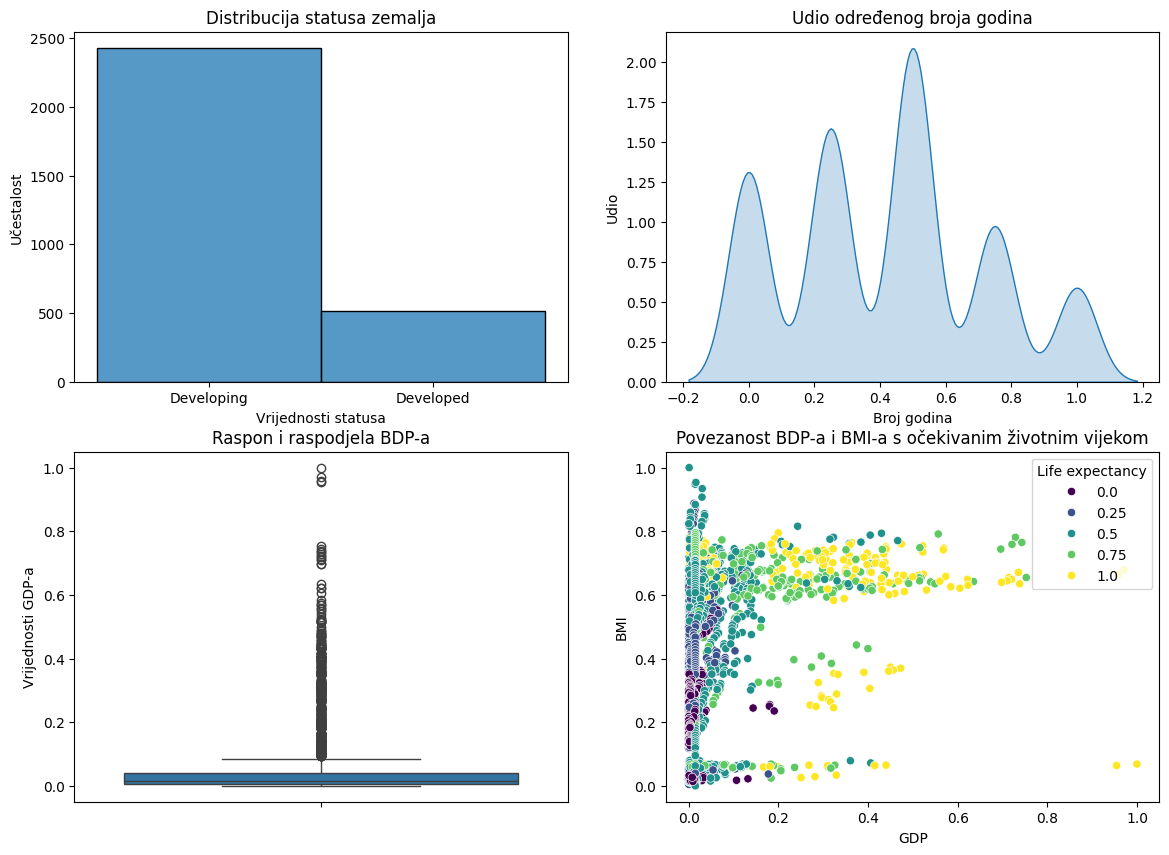

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data2['Status'], ax=axes[0, 0])
axes[0, 0].set_xlabel('Vrijednosti statusa')
axes[0, 0].set_ylabel('Učestalost')
axes[0, 0].set_title('Distribucija statusa zemalja')

sns.kdeplot(data2['Life expectancy'], ax=axes[0, 1], fill=True)
axes[0, 1].set_xlabel('Broj godina')
axes[0, 1].set_ylabel('Udio')
axes[0, 1].set_title('Udio određenog broja godina')

sns.boxplot(data=data2, y='GDP', ax=axes[1, 0])
axes[1, 0].set_ylabel('Vrijednosti GDP-a')
axes[1, 0].set_title('Raspon i raspodjela BDP-a')

sns.scatterplot(data=data2, x='GDP', y='BMI', hue='Life expectancy', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_xlabel('GDP')
axes[1, 1].set_ylabel('BMI')
axes[1, 1].set_title('Povezanost BDP-a i BMI-a s očekivanim životnim vijekom')
plt.show()
